In [34]:
# PCA Algorithm

import numpy as np

class PCA:
    
    def __init__(self, k_components):
        self.k_components = k_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store first k components
        self.components = eigenvectors[0:self.k_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X : (150, 4)
Shape of transformed X : (150, 2)


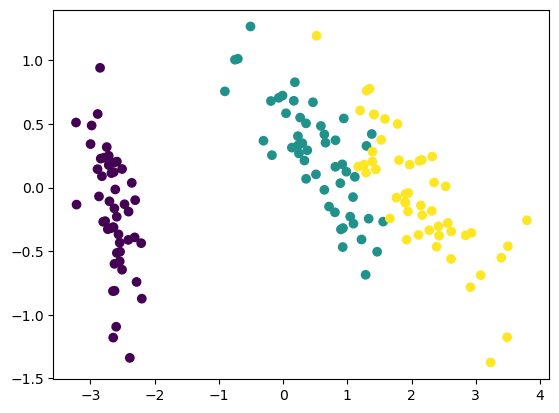

In [35]:
# test

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
# (150 ✕ 4)
X = data.data
y = data.target

# reduce 4D into 2D
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)
print("Shape of X :", X.shape)
print("Shape of transformed X :", X_projected.shape)

x1 = X_projected[:,0]
x2 = X_projected[:,1]

plt.scatter(x1, x2, c=y)
plt.show()